In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('data/insurance.csv')
df.head()


,eage,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [43]:
df.rename(columns={'eage':'age'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Q1: Do smokers have higher insurance charges than non-smokers?

#### **State your Null Hypothesis and Alternative Hypothesis**

**Null Hypothesis (H0)**: There is no difference in insurance charges between smokers and non-smokers.

**Alternative Hypothesis (H1)**: Smokers have higher insurance charges than non-smokers.

**alpha value** = 0.05

In [44]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [45]:
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()

smoker_charges = smoker_df['charges']
non_smoker_charges = non_smoker_df['charges']



In [46]:
# assumption 1: Outlier Detection
# Check for outliers in charges in the smoker group
zscores= stats.zscore(smoker_charges)
outliers = abs(zscores)>3
print(np.sum(outliers))

# check for outliers in weight for non-smoker group
zscores= stats.zscore(non_smoker_charges)
outliers = abs(zscores)>3
print(np.sum(outliers))



0
24


In [47]:
# testing assumption 2: Normality (smokers)
result_smoker_charges = stats.normaltest(smoker_charges)
result_smoker_charges

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [48]:
# testing assumption 2: Normality (non- smokers)
result_non_smoker_charges = stats.normaltest(non_smoker_charges)
result_non_smoker_charges

NormaltestResult(statistic=316.4528082392722, pvalue=1.9193129759002216e-69)

In [49]:
# testing assumption 3: equal variance

q1result = stats.levene(smoker_charges, non_smoker_charges)
q1result


LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [50]:
q1ttest_result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var=False)
q1ttest_result

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)

The p-value obtained from the t-test is virtually zero. We can pretty safely reject the null hypothesis that there is no difference in insurance charges between smokers and non-smokers.
The analysis provides very strong evidence to suggest that smokers do have higher insurance charges than non-smokers.

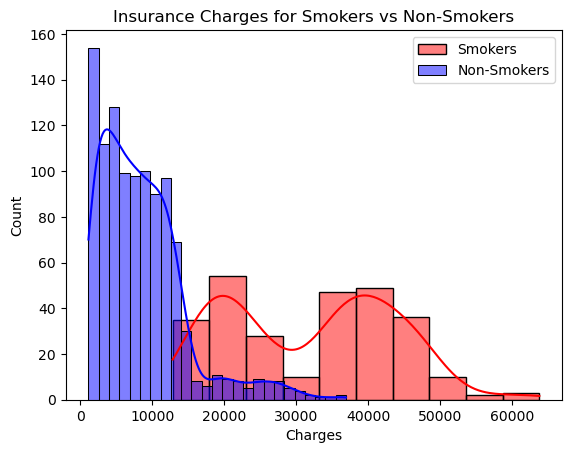

In [51]:
sns.histplot(data=smoker_df, x='charges', color='red', label='Smokers', kde=True)
sns.histplot(data=non_smoker_df, x='charges', color='blue', label='Non-Smokers', kde=True)
plt.title('Insurance Charges for Smokers vs Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.legend()
plt.show()


# Q2: Are men more likely to smoke than women?

**Null Hypothesis (H0):** The amount of men who smoke is the same as the amount of women who smoke.

**Alternative Hypothesis (H1):** The amount of men who smoke is not the same as the amount of women who smoke.

In [52]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

For this example we are goiing to use a Chi-Squared test 

In [53]:
table = pd.crosstab(df['sex'], df['smoker'])
q2result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = q2result

print(p)
p<.05



0.006548143503580696


True

With a p-value of approximately 0.00655, thats much less than the significance level of 0.05. We reject the null hypothesis and actually conclude there is a statistical significance of male smokers to female smokers


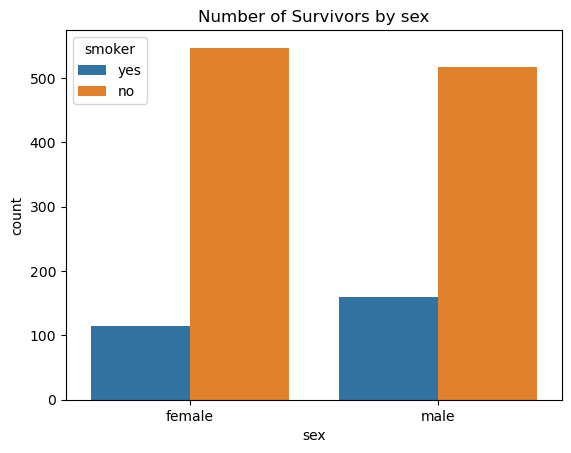

In [58]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Survivors by sex");



# Q3: Do different regions have different charges, on average?

**Null Hypothesis** (H0): average charges are the same across all regions.

**Alternative Hypothesis (H1):** average charges differ between at least two regions.

In [60]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [67]:
northeast_charges = df.loc[df['region'] == 'northeast']['charges']
northwest_charges = df.loc[df['region'] == 'northwest']['charges']
southeast_charges = df.loc[df['region'] == 'southeast']['charges']
southwest_charges = df.loc[df['region'] == 'southwest']['charges']


In [68]:
stats.normaltest(northeast_charges)
stats.normaltest(northwest_charges)
stats.normaltest(southeast_charges)
stats.normaltest(southwest_charges)

stats.levene(northeast_charges, northwest_charges, southeast_charges, southwest_charges)

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

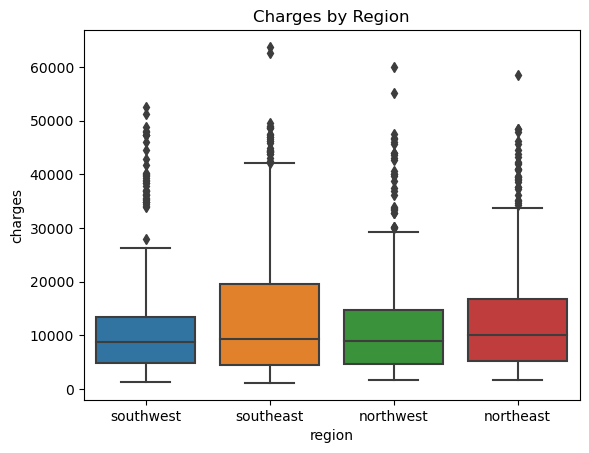

In [65]:
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()